**predicting housing prices** it's a regression problem where we predict a continous value for a paramater of interest. regression is different from from logistic regression in the sense that logreg is used for classification which is differet from regression which predits a continous value

**Loading the Boston housing dataset**

In [2]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [4]:
print("train_data",train_data.shape)
print("train_targets",train_targets.shape)
print("test_data.",test_data.shape)
print("train_targets",train_targets.shape)

train_data (404, 13)
train_targets (404,)
test_data. (102, 13)
train_targets (404,)


In [5]:
train_data


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
train_targets # the targets are the median values if the owner-occupied homes in thousands of $$


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

**Preparing the data**

Since all the features take a different range of data, it would be difficult for the network to learn info from the data. So, we would like to do *feature-wise normalization* where we take the mean of the column and subtract and divide each element with the mean and SD for that particular column. So that the feature is centered around 0 and has a unit SD. we'll be using numpy to perform this.


```
+------------+---------+--------+
|            |  A      |  B     |
+------------+---------+---------
|      0     | 0.626386| 1.52325|----axis=1----->
+------------+---------+--------+
             |         |
             | axis=0  |
             ↓         ↓
```





In [0]:
#training data
import numpy as np
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

#test_data
test_data -= mean
test_data /= std

# So, as you see that we are using training data for normalizing test data.


**Building your network**


```
Since we have a small sample, we'll use a small network with 64 nodes each. In general the less training data you have the worse overfiiting will be and using a small network is oe way to mitigate overfitting.
```



In [8]:
train_data.shape

(404, 13)

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))   # the network ends in a single output and with no activation because for instance if you had used any activation, say 'Sigmoid'
                               # then the output would be b/w 0 and 1 but now the output can be linear and can take any range of values.
                                # an activation fucntion constrains the range the values the o/p can take
  
  model.compile(optimizer='rmsprop',
               loss = 'mse', 
               
               metrics = ['mae'])     # mse-> mean Squared Error- which calculates the Square of the difference between 
                                      # mae-> mean absolute error - it's the absolute value of the difference between targets and predictions
                                      # for instance an mae = 0.5 means that your values are off by $ (0.5 *100) = $500
  return model

**Validating your approach using K-fold validation**


```
in K-fold validation the data 
```



In [10]:
for i in range(4):
  print(i)

0
1
2
3


In [0]:
a = np.array([1,2,3])
b = np.array([5,6,7])

In [0]:
c = np.concatenate([a,b])

In [13]:
train_data[100:]

array([[-3.99144493e-01,  3.58905660e-01, -1.14281587e+00, ...,
        -1.62718308e+00,  2.37107571e-01, -1.34300395e+00],
       [-3.43452240e-01, -4.83615471e-01, -7.20935262e-01, ...,
        -4.89607866e-01,  3.31155526e-01, -1.41753234e+00],
       [-3.54267805e-01, -4.83615471e-01, -1.77047370e-01, ...,
        -3.45777812e-02,  4.40949066e-01, -1.49289088e-03],
       ...,
       [-4.02029872e-01,  9.90796508e-01, -7.41514804e-01, ...,
        -7.17122908e-01,  7.94389419e-02, -6.77769041e-01],
       [-1.72920175e-01, -4.83615471e-01,  1.24588095e+00, ...,
        -1.71818909e+00, -9.87643619e-01,  4.20834664e-01],
       [-4.04226140e-01,  2.04394792e+00, -1.20161456e+00, ...,
        -1.30866202e+00,  2.33171175e-01, -1.15392266e+00]])

In [14]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(" precessing fold #",i)
  
  val_data = train_data[ i * num_val_samples : (i+1) * num_val_samples]    
  val_target = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[: i * num_val_samples], 
                                      train_data[(i+1) * num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], 
                                      train_targets[(i+1) * num_val_samples:]],axis = 0)
  model = build_model()
  model.fit(partial_train_data,
            partial_train_targets,
            epochs = num_epochs,
            batch_size =1,
            verbose = 0) # for silent training
  val_mse , val_mae = model.evaluate(val_data,val_target,verbose=0)
  all_scores.append(val_mae)
  
                                      
  

 precessing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
 precessing fold # 1
 precessing fold # 2
 precessing fold # 3


In [15]:
all_scores

[2.0581326413862775, 2.2001309324019025, 2.8750618802438868, 2.410775157484678]

In [16]:
np.mean(all_scores)

2.386025152879186

**Saving the Validation logs at each fold**

In [22]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(" precessing fold #",i)
  
  val_data = train_data[ i * num_val_samples : (i+1) * num_val_samples]    
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[: i * num_val_samples], 
                                      train_data[(i+1) * num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], 
                                      train_targets[(i+1) * num_val_samples:]],axis = 0)
  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_targets,
            epochs = num_epochs,validation_data=(val_data,val_targets),
            batch_size =1,
            verbose = 0) # for silent training
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  

 precessing fold # 0
 precessing fold # 1
 precessing fold # 2
 precessing fold # 3


In [0]:
avg_mae_history = [ np.mean( [x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [29]:
avg_mae_history

[4.254023790359497,
 3.451871038663505,
 3.197077686243718,
 2.964755329755273,
 2.7807781035357184,
 2.7454782535534097,
 2.6172257697228156,
 2.5908229374649503,
 2.5608712505586078,
 2.611888621113088,
 2.54677413123669,
 2.4798901553201205,
 2.5579509074145026,
 2.4644447659501934,
 2.573490874602063,
 2.551732086899257,
 2.398983197637124,
 2.39743435854959,
 2.3362261174929024,
 2.4416178901596823,
 2.416783905265355,
 2.476753050738042,
 2.4786771028348715,
 2.406688645334527,
 2.4570896790759402,
 2.4444995823473032,
 2.451478102419636,
 2.338781260027744,
 2.5006970261583232,
 2.4103804283803054,
 2.4428521064248416,
 2.352549395938911,
 2.5322890210859845,
 2.4470538892368277,
 2.3027616880907873,
 2.4365477290483986,
 2.3778069821914825,
 2.327812504060198,
 2.391035271163034,
 2.364642335636781,
 2.373834506119832,
 2.280267563196692,
 2.44615910903062,
 2.330035123494592,
 2.398986317143582,
 2.3492372012374423,
 2.263252359805721,
 2.3298524960432903,
 2.3363996071390587,

In [0]:
import matplotlib.pyplot as plt

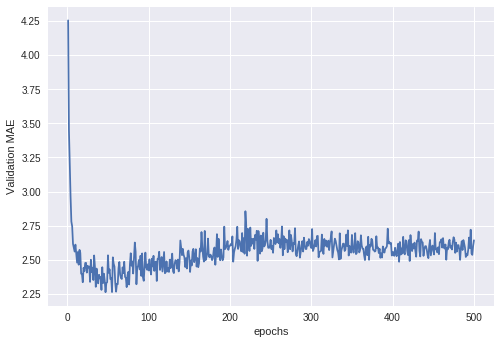

In [31]:
plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
plt.xlabel("epochs")
plt.ylabel("Validation MAE")
plt.show()